In [1]:
!pip3 install kmapper numpy matplotlib scikit-learn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
n_samples = 300
n_outliers = 10
X, _ = make_blobs(n_samples=n_samples, centers=2, cluster_std=0.60, random_state=0)

In [3]:
# Add anomalies
np.random.seed(42)
outliers = np.random.uniform(low=-6, high=6, size=(n_outliers, 2))
X = np.vstack((X, outliers))

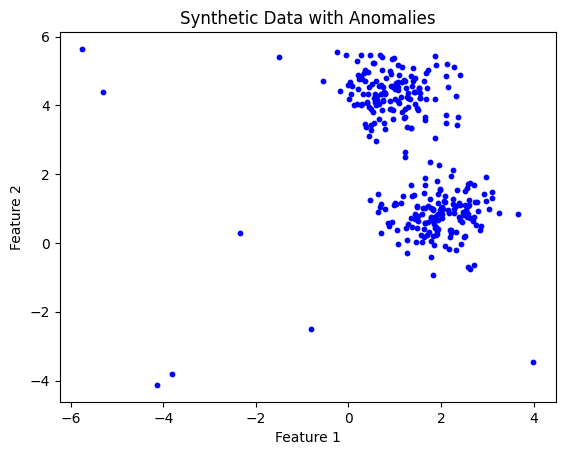

In [4]:
# Visualize the data
plt.scatter(X[:, 0], X[:, 1], color='blue', s=10)
plt.title("Synthetic Data with Anomalies")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [5]:
import kmapper as km
from sklearn.cluster import DBSCAN

# Initialize the KeplerMapper object
mapper = km.KeplerMapper()


In [6]:
# Fit and transform the data using a projection (e.g., PCA)
projected_data = mapper.fit_transform(X)

In [7]:
# Create a cover for the Mapper algorithm
cover = km.Cover(n_cubes=10, perc_overlap=0.5)

In [8]:
# Map the projected data to create a graph using DBSCAN for clustering
graph = mapper.map(projected_data,
                    X=X,
                    clusterer=DBSCAN(eps=0.5, min_samples=5),
                    cover=cover)

In [13]:
# np.c_[np.array([0] * n_samples),np.array([1] * n_outliers)]

In [19]:
graph.keys()

dict_keys(['nodes', 'links', 'simplices', 'meta_data', 'meta_nodes'])

In [24]:
graph['nodes']['cube4_cluster0']

[18,
 24,
 36,
 50,
 53,
 57,
 67,
 74,
 92,
 99,
 105,
 117,
 139,
 141,
 148,
 150,
 158,
 168,
 179,
 190,
 229,
 249,
 253,
 280]

In [22]:
graph['links']

defaultdict(list,
            {'cube4_cluster0': ['cube5_cluster0'],
             'cube5_cluster0': ['cube6_cluster0'],
             'cube6_cluster0': ['cube7_cluster1'],
             'cube6_cluster1': ['cube7_cluster0'],
             'cube7_cluster0': ['cube8_cluster0']})

In [17]:
mapper.visualize(graph,
                 path_html="mapper_output.html",
                 title="Mapper Output with Anomalies",
                 )
from IPython.display import IFrame
IFrame('mapper_output.html', width='100%', height=700)

In [28]:
import pandas as pd 

In [29]:
df=pd.DataFrame(X)

In [33]:
reverse_mapping = {}
for key, indices in graph['nodes'].items():
    for index in indices:
        if index not in reverse_mapping:
            reverse_mapping[index] = []
        reverse_mapping[index].append(key)
df['id']=df.index
# Add a new column to the DataFrame based on the reverse mapping
df['new_column'] = df['id'].map(reverse_mapping).apply(lambda i: i if isinstance(i, list) else [])

print(df)

            0         1   id                        new_column
0    2.406157  4.870475    0                  [cube8_cluster0]
1    2.580767  0.828599    1  [cube5_cluster0, cube6_cluster0]
2    1.062696  5.176351    2  [cube7_cluster0, cube8_cluster0]
3    2.548219  0.900839    3  [cube5_cluster0, cube6_cluster0]
4    1.390161  5.084895    4  [cube7_cluster0, cube8_cluster0]
..        ...       ...  ...                               ...
305 -5.752986  5.638918  305                                []
306  3.989312 -3.451931  306                                []
307 -3.818100 -3.799146  307                                []
308 -2.349093  0.297077  308                                []
309 -0.816660 -2.505250  309                                []

[310 rows x 4 columns]


In [34]:
df

,0,1,id,new_column
0,2.406157,4.870475,0,[cube8_cluster0]
1,2.580767,0.828599,1,"[cube5_cluster0, cube6_cluster0]"
2,1.062696,5.176351,2,"[cube7_cluster0, cube8_cluster0]"
3,2.548219,0.900839,3,"[cube5_cluster0, cube6_cluster0]"
4,1.390161,5.084895,4,"[cube7_cluster0, cube8_cluster0]"
...,...,...,...,...
305,-5.752986,5.638918,305,[]
306,3.989312,-3.451931,306,[]
307,-3.818100,-3.799146,307,[]
308,-2.349093,0.297077,308,[]


In [35]:
df.tail(20)

,0,1,id,new_column
290,0.224593,4.770282,290,"[cube6_cluster1, cube7_cluster0]"
291,1.437306,0.687698,291,"[cube5_cluster0, cube6_cluster0]"
292,2.696373,0.625632,292,"[cube5_cluster0, cube6_cluster0]"
293,0.935325,5.331793,293,"[cube7_cluster0, cube8_cluster0]"
294,2.715438,1.676477,294,"[cube6_cluster0, cube7_cluster1]"
295,2.614377,1.101643,295,"[cube6_cluster0, cube7_cluster1]"
296,0.584825,4.069215,296,"[cube6_cluster1, cube7_cluster0]"
297,1.187347,1.377842,297,"[cube5_cluster0, cube6_cluster0]"
298,1.623505,0.409868,298,"[cube5_cluster0, cube6_cluster0]"
299,1.288909,3.958315,299,"[cube7_cluster0, cube8_cluster0]"
